In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df=pd.read_csv("weatherAUS.csv")

In [30]:
df["MinTemp"].fillna(value=np.mean(df["MinTemp"]),inplace=True)
df["MaxTemp"].fillna(value=np.mean(df["MaxTemp"]),inplace=True)
df["Humidity9am"].fillna(value=np.mean(df["Humidity9am"]),inplace=True)
df["Humidity3pm"].fillna(value=np.mean(df["Humidity3pm"]),inplace=True)
df["Temp9am"].fillna(value=np.mean(df["Temp9am"]),inplace=True)
df["Temp3pm"].fillna(value=np.mean(df["Temp3pm"]),inplace=True)
df["WindSpeed9am"].fillna(value=np.mean(df["WindSpeed9am"]),inplace=True)
df["WindSpeed3pm"].fillna(value=np.mean(df["WindSpeed3pm"]),inplace=True)
df["Pressure9am"].fillna(value=np.mean(df["Pressure9am"]),inplace=True)
df["Pressure3pm"].fillna(value=np.mean(df["Pressure3pm"]),inplace=True)
df["Rainfall"].fillna(value=np.mean(df["Rainfall"]),inplace=True)
df["WindGustSpeed"].fillna(value=np.mean(df["WindGustSpeed"]),inplace=True)
df["Evaporation"].fillna(value=np.mean(df["Evaporation"]),inplace=True)
df.drop("Sunshine",axis=1,inplace=True)
df.drop(["Cloud9am","Cloud3pm"],axis=1,inplace=True)
df.drop(["WindDir3pm","WindDir9am"],axis=1,inplace=True)
df.drop("WindGustDir",axis=1,inplace=True)

In [31]:
def converter(x):
    if(x=="Yes"):
        return 1
    else:
        return 0

In [32]:
df["RTom"]=df["RainTomorrow"].apply(converter)
df["RTod"]=df["RainToday"].apply(converter)

In [33]:
df["RainTomorrow"].value_counts()
df["RainTomorrow"].isna().value_counts()
df["RainTomorrow"].dropna(inplace=True)

<AxesSubplot:>

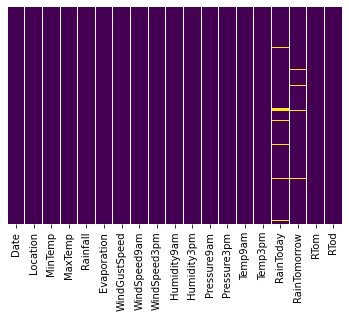

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [42]:
from sklearn.model_selection import train_test_split

In [36]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RTom,RTod
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,0,0


In [56]:
data=df.drop(["Date","Location","RainToday","RainTomorrow"],axis=1)

In [41]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RTom,RTod
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [27]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RTod
0,13.4,22.9,0.6,5.468232,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,5.468232,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,5.468232,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,5.468232,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,5.468232,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [57]:
X=data.drop("RTom",axis=1)
y=data["RTom"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc=RandomForestClassifier(n_estimators=100)

In [58]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
rfc_pred=rfc.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

[[35787  1580]
 [ 5582  5053]]


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     37367
           1       0.76      0.48      0.59     10635

    accuracy                           0.85     48002
   macro avg       0.81      0.72      0.75     48002
weighted avg       0.84      0.85      0.84     48002

